# MORF API Working Demo

Here, we want to validate visually that MORF API works as intended. First, we show the 2D contiguous convolutional splitter.

In [1]:
%load_ext nb_black
%load_ext lab_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [2]:
import sys

sys.path.append("../../")

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
from oblique_forests.tree.morf_split import Conv2DSplitter

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

# Splitters: Convolutional 2D Patches (Contiguous and Discontiguous)

## Contiguous 2D Convolutional Patch

In [4]:
random_state = 123456

n = 50
height = 5
d = 4
X = np.ones((n, height * d))
y = np.ones((n,))
y[:25] = 0

<IPython.core.display.Javascript object>

In [6]:
splitter = Conv2DSplitter(
    X,
    y,
    max_features=1,
    feature_combinations=1.5,
    random_state=random_state,
    image_height=height,
    image_width=d,
    patch_height_max=5,
    patch_height_min=1,
    patch_width_min=1,
    patch_width_max=2,
)

<IPython.core.display.Javascript object>

In [8]:
%%timeit
proj_X, proj_mat = splitter.sample_proj_mat(sample_inds=np.arange(n))

779 µs ± 41 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<IPython.core.display.Javascript object>

In [9]:
proj_X, proj_mat = splitter.sample_proj_mat(sample_inds=np.arange(n))

<IPython.core.display.Javascript object>

In [10]:
print(proj_X.shape, proj_mat.shape, X.shape)

(50, 20) (20, 20) (50, 20)


<IPython.core.display.Javascript object>

[Text(0.5, 1.0, 'Sampled Projection Matrix - 2D Convolutional MORF'),
 Text(0.5, 28.5, 'Sampled Patches'),
 Text(28.5, 0.5, 'Vectorized Projections')]

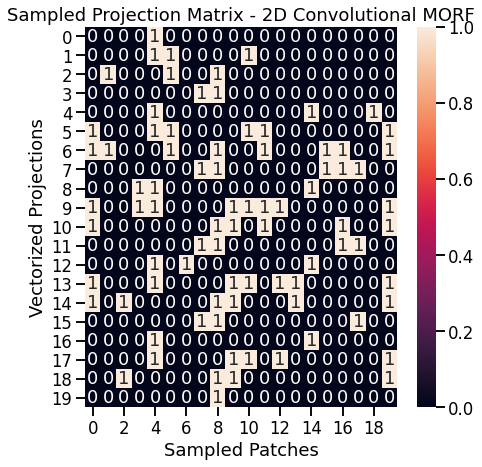

<IPython.core.display.Javascript object>

In [11]:
sns.set_context(
    "talk",
    #                 font_scale=1.5
)
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(proj_mat, annot=True, ax=ax)
ax.set(
    title="Sampled Projection Matrix - 2D Convolutional MORF",
    xlabel="Sampled Patches",
    ylabel="Vectorized Projections",
)

<ipython-input-44-92ced63bb350>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


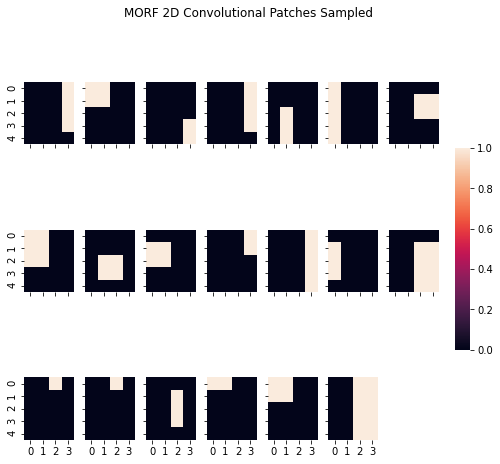

<IPython.core.display.Javascript object>

In [44]:
empty_mat = np.zeros((height, d))

fig, axs = plt.subplots(3, np.ceil(proj_mat.shape[1] / 3).astype(int), 
                        sharex=True, sharey=True,
                        figsize=(7, 7))
axs = axs.flat
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for idx in range(proj_mat.shape[1]):
    proj_vec = proj_mat[:, idx]
    
    vec_idx = np.argwhere(proj_vec == 1)
    patch_idx = np.unravel_index(vec_idx, shape=(height, d))
    mat = empty_mat.copy()
    mat[patch_idx] = 1.0
    
    sns.heatmap(mat, ax=axs[idx], 
                xticklabels=np.arange(d),
                yticklabels=np.arange(height),
                cbar=idx == 0,
                square=True,
                vmin=0, vmax=1,
                cbar_ax=None if idx else cbar_ax)

# remove unused axes
idx += 1
while idx < len(axs):
    fig.delaxes(axs[idx])
    idx += 1
    
fig.suptitle('MORF 2D Convolutional Patches Sampled')
fig.tight_layout(rect=[0, 0, .9, 1])

## Discontiguous Sample

In [60]:
random_state = 123456

n = 50
height = 5
d = 4
X = np.ones((n, height * d))
y = np.ones((n,))
y[:25] = 0

<IPython.core.display.Javascript object>

In [71]:
splitter = Conv2DSplitter(
    X,
    y,
    max_features=1,
    feature_combinations=1.5,
    random_state=random_state,
    image_height=height,
    image_width=d,
    patch_height_max=5,
    patch_height_min=1,
    patch_width_min=1,
    patch_width_max=2,
    discontiguous_height=True,
    discontiguous_width=False,
)

<IPython.core.display.Javascript object>

In [72]:
proj_X, proj_mat = splitter.sample_proj_mat(sample_inds=np.arange(n))

<IPython.core.display.Javascript object>

In [73]:
print(proj_X.shape, proj_mat.shape, X.shape)

(50, 20) (20, 20) (50, 20)


<IPython.core.display.Javascript object>

[Text(0.5, 1.0, 'Sampled Projection Matrix - 2D Convolutional MORF'),
 Text(0.5, 28.5, 'Sampled Patches'),
 Text(28.5, 0.5, 'Vectorized Projections')]

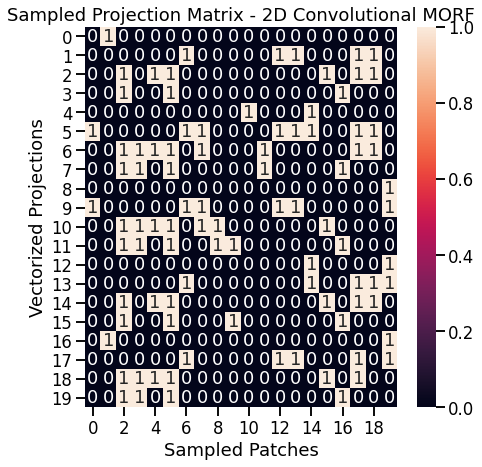

<IPython.core.display.Javascript object>

In [74]:
sns.set_context(
    "talk",
    #                 font_scale=1.5
)
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(proj_mat, annot=True, ax=ax)
ax.set(
    title="Sampled Projection Matrix - 2D Convolutional MORF",
    xlabel="Sampled Patches",
    ylabel="Vectorized Projections",
)

<ipython-input-75-a343e31dc33b>:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


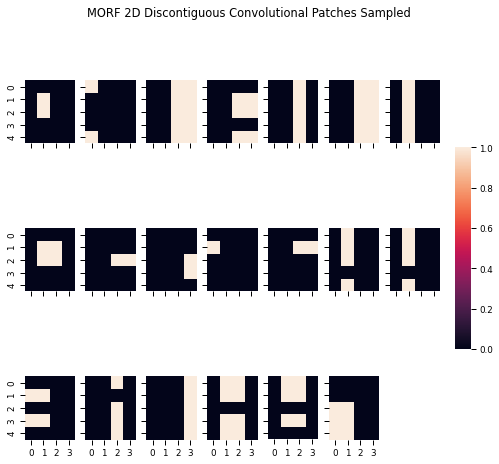

<IPython.core.display.Javascript object>

In [75]:
empty_mat = np.zeros((height, d))

sns.set_context("paper")
fig, axs = plt.subplots(
    3,
    np.ceil(proj_mat.shape[1] / 3).astype(int),
    sharex=True,
    sharey=True,
    figsize=(7, 7),
)
axs = axs.flat
cbar_ax = fig.add_axes([0.91, 0.3, 0.03, 0.4])

for idx in range(proj_mat.shape[1]):
    proj_vec = proj_mat[:, idx]

    vec_idx = np.argwhere(proj_vec == 1)
    patch_idx = np.unravel_index(vec_idx, shape=(height, d))
    mat = empty_mat.copy()
    mat[patch_idx] = 1.0

    sns.heatmap(
        mat,
        ax=axs[idx],
        xticklabels=np.arange(d),
        yticklabels=np.arange(height),
        cbar=idx == 0,
        square=True,
        vmin=0,
        vmax=1,
        cbar_ax=None if idx else cbar_ax,
    )

# remove unused axes
idx += 1
while idx < len(axs):
    fig.delaxes(axs[idx])
    idx += 1

fig.suptitle("MORF 2D Discontiguous Convolutional Patches Sampled")
fig.tight_layout(rect=[0, 0, 0.9, 1])

## Profiling the Projection Matrix Sampling

Let's increase the sample size and the height and the width of samples.

Note that if ``height`` or ``d`` is increased too much... then it's pretty slow currently.

In [44]:
n = 1000
height = 100
d = 80
X = np.ones((n, height * d))
y = np.ones((n,))
y[:25] = 0

<IPython.core.display.Javascript object>

In [45]:
splitter = Conv2DSplitter(X, y, max_features=1, feature_combinations=1.5,
        random_state=random_state, image_height=height, image_width=d, 
        patch_height_max=5, patch_height_min=1, patch_width_min=1, patch_width_max=2)

<IPython.core.display.Javascript object>

In [47]:
%%timeit
proj_X, proj_mat = splitter.sample_proj_mat(sample_inds=np.arange(n))

1.53 s ± 101 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<IPython.core.display.Javascript object>

In [34]:
%%timeit
proj_X, proj_mat = splitter.sample_proj_mat(sample_inds=np.arange(n))

165 ms ± 7.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<IPython.core.display.Javascript object>

In [48]:
%%prun
proj_X, proj_mat = splitter.sample_proj_mat(sample_inds=np.arange(n))

<IPython.core.display.Javascript object>

         280026 function calls in 1.675 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    1.268    1.268    1.609    1.609 morf.py:194(sample_proj_mat)
     8000    0.092    0.000    0.340    0.000 morf.py:131(_get_rand_patch_idx)
        1    0.067    0.067    1.675    1.675 <string>:1(<module>)
    24002    0.058    0.000    0.144    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
     8002    0.044    0.000    0.044    0.000 {method 'randint' of 'numpy.random.mtrand.RandomState' objects}
     8000    0.035    0.000    0.086    0.000 index_tricks.py:35(ix_)
    16001    0.026    0.000    0.026    0.000 {built-in method numpy.arange}
    32000    0.014    0.000    0.021    0.000 numerictypes.py:285(issubclass_)
    16000    0.014    0.000    0.037    0.000 numerictypes.py:359(issubdtype)
    16000    0.009    0.000    0.009    0.000 {method 'reshape' of 'numpy.ndarray' objects}
    

In [42]:
%%prun
proj_X, proj_mat = splitter.sample_proj_mat(sample_inds=np.arange(n))

<IPython.core.display.Javascript object>

         288026 function calls in 1.677 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    1.294    1.294    1.669    1.669 morf.py:192(sample_proj_mat)
     8000    0.082    0.000    0.131    0.000 morf.py:131(_get_rand_patch_idx)
    24002    0.065    0.000    0.159    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
     8002    0.050    0.000    0.050    0.000 {method 'randint' of 'numpy.random.mtrand.RandomState' objects}
     8000    0.039    0.000    0.094    0.000 index_tricks.py:35(ix_)
    16001    0.029    0.000    0.029    0.000 {built-in method numpy.arange}
     8000    0.019    0.000    0.197    0.000 morf.py:160(_get_patch_idx)
    16000    0.015    0.000    0.039    0.000 numerictypes.py:359(issubdtype)
    32000    0.015    0.000    0.022    0.000 numerictypes.py:285(issubclass_)
    16000    0.010    0.000    0.010    0.000 {method 'reshape' of 'numpy.ndarray' object

In [35]:
%%prun
proj_X, proj_mat = splitter.sample_proj_mat(sample_inds=np.arange(n))

<IPython.core.display.Javascript object>

         72026 function calls in 0.171 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.084    0.084    0.167    0.167 morf.py:192(sample_proj_mat)
     2000    0.017    0.000    0.027    0.000 morf.py:131(_get_rand_patch_idx)
     6002    0.014    0.000    0.035    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
     2002    0.010    0.000    0.010    0.000 {method 'randint' of 'numpy.random.mtrand.RandomState' objects}
     2000    0.008    0.000    0.021    0.000 index_tricks.py:35(ix_)
     4001    0.006    0.000    0.006    0.000 {built-in method numpy.arange}
     2000    0.004    0.000    0.043    0.000 morf.py:160(_get_patch_idx)
        1    0.004    0.004    0.171    0.171 <string>:1(<module>)
     8000    0.003    0.000    0.005    0.000 numerictypes.py:285(issubclass_)
     4000    0.003    0.000    0.009    0.000 numerictypes.py:359(issubdtype)
        1    0.003    0

In [23]:
%%prun
proj_X, proj_mat = splitter.sample_proj_mat(sample_inds=np.arange(n))

<IPython.core.display.Javascript object>

         76006 function calls in 0.170 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.083    0.083    0.170    0.170 morf.py:201(sample_proj_mat)
     6000    0.021    0.000    0.021    0.000 {method 'randint' of 'numpy.random.mtrand.RandomState' objects}
     6000    0.015    0.000    0.036    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
     2000    0.009    0.000    0.030    0.000 morf.py:131(_get_rand_patch_idx)
     2000    0.008    0.000    0.021    0.000 index_tricks.py:35(ix_)
     4001    0.006    0.000    0.006    0.000 {built-in method numpy.arange}
     2000    0.005    0.000    0.044    0.000 morf.py:169(_get_patch_idx)
     4000    0.004    0.000    0.009    0.000 numerictypes.py:359(issubdtype)
     8000    0.003    0.000    0.005    0.000 numerictypes.py:285(issubclass_)
        1    0.003    0.003    0.003    0.003 {built-in method numpy.zeros}
     4000    0

# Classification Tree - Convolutional Tree

In [52]:
from oblique_forests.tree.morf_tree import Conv2DObliqueTreeClassifier

<IPython.core.display.Javascript object>

In [53]:
clf = Conv2DObliqueTreeClassifier(
    random_state=random_state,
    image_height=height,
    image_width=d,
    patch_height_max=5,
    patch_height_min=1,
    patch_width_min=1,
    patch_width_max=2,
    discontiguous_height=True,
    discontiguous_width=False,
)

TypeError: super(type, obj): obj must be an instance or subtype of type

<IPython.core.display.Javascript object>

In [6]:
clf.fit(X, y)

Conv2DObliqueTreeClassifier(discontiguous_height=True, image_height=5,
                            image_width=4, patch_height_max=5,
                            patch_width_max=2, random_state=123456)

<IPython.core.display.Javascript object>

# Classification Forest - Convolutional Forest

In [7]:
from proglearn.tree.morf import Conv2DObliqueForestClassifier

<IPython.core.display.Javascript object>

In [11]:
clf = Conv2DObliqueForestClassifier(
    n_estimators=100,
    random_state=random_state,
    image_height=height,
    image_width=d,
    patch_height_max=5,
    patch_height_min=1,
    patch_width_min=1,
    patch_width_max=2,
    discontiguous_height=True,
    discontiguous_width=False,
    n_jobs=-1,
)

NameError: name 'Conv2DObliqueForestClassifier' is not defined

<IPython.core.display.Javascript object>

In [16]:
clf.fit(X, y)

Conv2DObliqueForestClassifier(discontiguous_height=True, image_height=5,
                              image_width=4, n_jobs=-1, patch_height_max=5,
                              patch_width_max=2, random_state=123456)

<IPython.core.display.Javascript object>

In [17]:
%%timeit
clf.fit(X, y)

6.38 s ± 196 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<IPython.core.display.Javascript object>

In [18]:
%%prun
clf.fit(X, y)

<IPython.core.display.Javascript object>

         199570 function calls (195767 primitive calls) in 6.434 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      388    6.300    0.016    6.300    0.016 {method 'acquire' of '_thread.lock' objects}
      500    0.017    0.000    0.066    0.000 inspect.py:2112(_signature_from_function)
    10000    0.017    0.000    0.035    0.000 inspect.py:2477(__init__)
    10000    0.014    0.000    0.015    0.000 enum.py:289(__call__)
 2000/100    0.009    0.000    0.051    0.001 base.py:28(clone)
      500    0.006    0.000    0.008    0.000 base.py:165(<listcomp>)
      500    0.006    0.000    0.101    0.000 base.py:178(get_params)
      500    0.005    0.000    0.009    0.000 inspect.py:2760(__init__)
      500    0.005    0.000    0.093    0.000 base.py:151(_get_param_names)
    29500    0.004    0.000    0.004    0.000 inspect.py:2527(name)
      500    0.004    0.000    0.005    0.000 base.py:176(<listcomp>)
    10500    0.

# Plan

- cythonize splitter in adherence to sklearn's `_splitter.pyx` pattern
- incorporate sklearn's `_criterion.pyx` code
- develop feature importances in Python
- develop graph sampling
- develop generalized convolutional filter bank: gabor, FT, wavelets
    - to patch or not to patch?
    - allowing Python lambda functions to be passed arbitrarily into the Cython tree builder?
    
    
Gabor filter:
1. When we sample a filter, it is KxK, and if we convolve this filter on an image, HxW, then we might sum up the response to represent as one number?
2. imaginary vs real filter response: (symmetric vs anti-symmetric), or taking the l2 norm of the signal response (square root of sum of squared real and imaginary components)
3. how to do patch-selection?

In [5]:
from skimage.filters import gabor_kernel
from scipy import ndimage as ndi
from scipy.signal import convolve2d, convolve, fftconvolve
import scipy

<IPython.core.display.Javascript object>

In [6]:
def output_shape(n_stds, sigma_x, sigma_y, theta):
    y0 = np.ceil(
        max(
            np.abs(n_stds * sigma_y * np.cos(theta)),
            np.abs(n_stds * sigma_x * np.sin(theta)),
            1,
        )
    )

    x0 = np.ceil(
        max(
            np.abs(n_stds * sigma_x * np.cos(theta)),
            np.abs(n_stds * sigma_y * np.sin(theta)),
            1,
        )
    )

    print(y0)
    y, x = np.mgrid[-y0 : y0 + 1, -x0 : x0 + 1]
    print(y.shape, x.shape)
    #     print(y)
    #     print(x)
    return y.shape


bandwidth = 1
frequency = 0.5
theta = 0
sigma_x = bandwidth / frequency
sigma_y = bandwidth / frequency

output_shape(3, sigma_x, sigma_y, theta)

6.0
(13, 13) (13, 13)


(13, 13)

<IPython.core.display.Javascript object>

In [22]:
X = np.random.normal(size=(n, height * d))
y = np.ones((n,))
print(X.shape)

sample_X = X.reshape(50, height, d)
print(sample_X.shape)

(50, 20)
(50, 5, 4)


<IPython.core.display.Javascript object>

In [25]:
frequency = 0.2
kernel = gabor_kernel(frequency=frequency, n_stds=3, bandwidth=1)
print(kernel.shape)

(19, 19)


<IPython.core.display.Javascript object>

In [32]:
pad_size = list(map(int, ((kernel.shape[0] - 1) / 2, (kernel.shape[1] - 1) / 2)))

sample_X = torch.tensor(sample_X.reshape(50, 1, height, d))
tensor_kernel = kernel.reshape(1, 1, kernel.shape[0], kernel.shape[1])
real_kernel = tensor_kernel.real
imag_kernel = tensor_kernel.imag

tensor_kernel = np.concatenate((real_kernel, imag_kernel), axis=0)
print(tensor_kernel.shape)
tensor_kernel = torch.tensor(tensor_kernel)


output = torch.conv2d(sample_X, tensor_kernel, padding=pad_size)

print(output.shape)
print(tensor_kernel.shape)
print(sample_X.shape)

<ipython-input-32-46a57baa3b09>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_X = torch.tensor(sample_X.reshape(50, 1, height, d))


(2, 1, 19, 19)
torch.Size([50, 2, 5, 4])
torch.Size([2, 1, 19, 19])
torch.Size([50, 1, 5, 4])


<IPython.core.display.Javascript object>

(5, 4)


<AxesSubplot:>

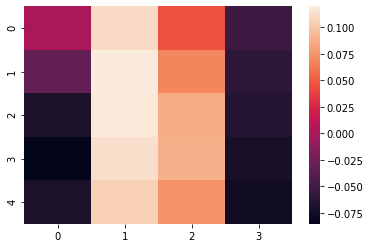

<IPython.core.display.Javascript object>

In [31]:
test = convolve(sample_X[0, ...], kernel, mode="same")
print(test.shape)
sns.heatmap(test.real)

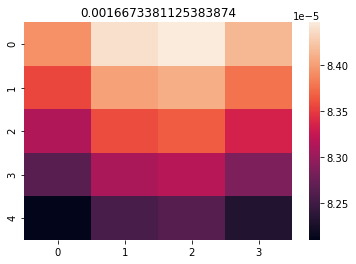

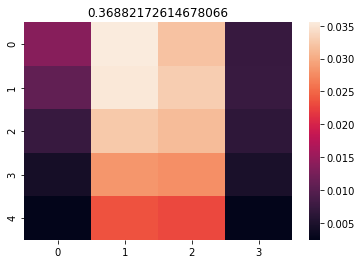

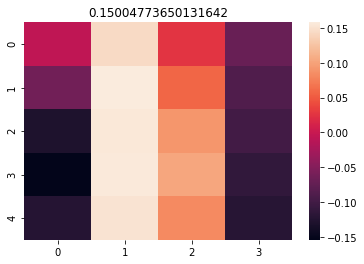

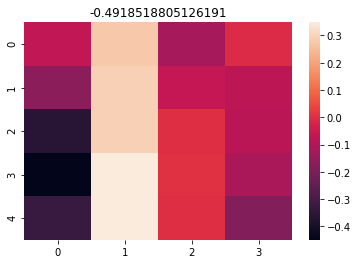

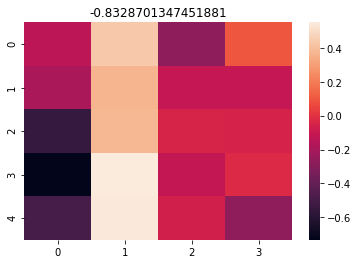

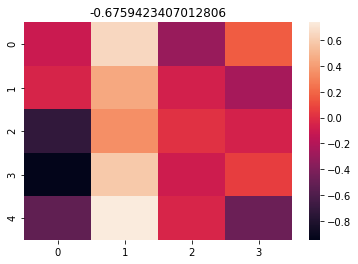

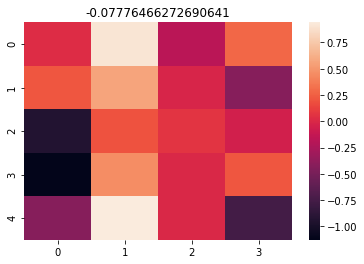

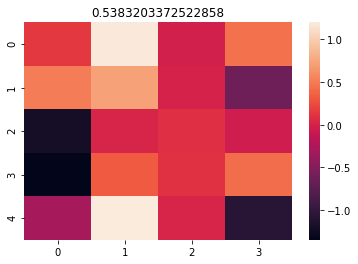

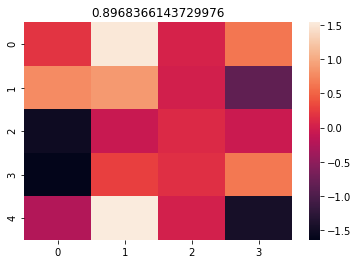

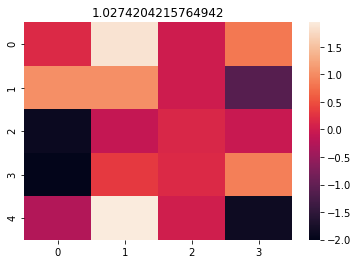

<IPython.core.display.Javascript object>

In [34]:
frequency = 0.2

for frequency in np.linspace(0.01, 1.0, 10):

    kernel = gabor_kernel(
        frequency=frequency,
        n_stds=3,
        bandwidth=1.5
        #                       sigma_x=1, sigma_y=1
    )
    test = convolve(sample_X[0, ...], kernel, mode="same")
    plt.figure()
    sns.heatmap(test.real)
    plt.title(test.real.sum())

    # plt.figure()
    # sns.heatmap(kernel.imag)

In [25]:
frequency = 0.2
kernel = gabor_kernel(frequency=frequency, n_stds=3, bandwidth=1)
print(kernel.shape)

(19, 19)


<IPython.core.display.Javascript object>

In [86]:
image_height = height
image_width = d
image_height = 2 + 1
image_width = 3 + 1

# reference: https://stackoverflow.com/questions/16798888/2-d-convolution-as-a-matrix-matrix-multiplication
output_size = (image_height + kernel.shape[0] - 1, image_width + kernel.shape[1] - 1)

# zero-pad filter matrix
pad_width = [
    (output_size[0] - kernel.shape[0], 0),
    (0, output_size[1] - kernel.shape[1]),
]
kernel_padded = np.pad(kernel, pad_width=pad_width)

print(f"Image shape: ", image_height, image_width)
print(f"Initial kernel shape: ", kernel.shape)
print(f"The final output size {output_size} of the vectorized convolution kernel")
print(kernel_padded.shape)

Image shape:  3 4
Initial kernel shape:  (19, 19)
The final output size (21, 22) of the vectorized convolution kernel
(21, 22)


<IPython.core.display.Javascript object>

In [87]:
# create the toeplitz matrix for each row of the filter
toeplitz_list = []
for i in range(kernel_padded.shape[0]):
    c = kernel_padded[
        i, :
    ]  # i th row of the F to define first column of toeplitz matrix

    # first row for the toeplitz fuction should be defined otherwise
    # the result is wrong
    r = np.hstack([c[0], np.zeros(int(image_width * image_height / 2) - 1)])

    # create the toeplitz matrix
    toeplitz_m = scipy.linalg.toeplitz(c, r)

    assert toeplitz_m.shape == (kernel_padded.shape[1], len(r))

    #     print(toeplitz_m.shape)
    toeplitz_list.append(toeplitz_m)

# create block matrix
zero_block = np.zeros(toeplitz_m.shape)
block_seq = []
for idx, block in enumerate(toeplitz_list):
    if idx == 0:
        block_seq.append([block, zero_block])
    else:
        block_seq.append([block, toeplitz_list[idx - 1]])
doubly_block_mat = np.block(block_seq)

print(toeplitz_m.shape)
print(len(toeplitz_list))
print(image_height * image_width, doubly_block_mat.shape)
# print(doubly_indices.shape)

assert image_height * image_width == doubly_block_mat.shape[1]

(22, 6)
21
12 (462, 12)


<IPython.core.display.Javascript object>

In [25]:
test = convolve(sample_X[0, ...], kernel, mode="same")

<IPython.core.display.Javascript object>

In [15]:
from scipy import linalg


def toeplitz_1_ch(kernel, input_size):
    # shapes
    k_h, k_w = kernel.shape
    i_h, i_w = input_size
    # o_h, o_w = i_h-k_h+1, i_w-k_w+1
    o_h, o_w = i_h, i_w
    # construct 1d conv toeplitz matrices for the kernel, with "same" padding
    n = i_h

    K1 = np.zeros((n,))
    K1[:2] = (kernel[1, 1], kernel[1, 2])
    K2 = np.zeros((n,))
    K2[:2] = (kernel[1, 1], kernel[1, 0])

    K = linalg.toeplitz(c=K2, r=K1)
    KK = np.identity(n)

    L1 = np.zeros((n,))
    L1[:2] = (kernel[2, 1], kernel[2, 2])
    L2 = np.zeros((n,))
    L2[:2] = (kernel[2, 1], kernel[2, 0])

    t = np.zeros(n)
    s = np.zeros(n)
    s[1] = 1
    L = linalg.toeplitz(c=L2, r=L1)
    LL = linalg.toeplitz(r=s, c=t)

    A = np.kron(LL, L) + np.kron(KK, K)

    L1 = np.zeros((n,))
    L1[:2] = (kernel[0, 1], kernel[0, 2])
    L2 = np.zeros((n,))
    L2[:2] = (kernel[0, 1], kernel[0, 0])

    L = linalg.toeplitz(c=L2, r=L1)
    LL = linalg.toeplitz(c=s, r=t)
    A = A + np.kron(LL, L)
    return A


def toeplitz_mult_ch(kernel, output_size):
    """Compute toeplitz matrix for 2d conv with multiple in and out channels.
    Args:
        kernel: shape=(n_out, n_in, H_k, W_k)
        input_size: (n_in, H_i, W_i)"""
    # reference: https://stackoverflow.com/questions/60643786/2d-convolution-with-padding-same-via-toeplitz-matrix-multiplication
    kernel_size = kernel.shape
    input_size = output_size
    # same padding should result in the shape as
    # input image
    #     output_size = (image_height, image_width)
    #     T = np.zeros(
    #         (
    #             output_size[0],
    #             int(np.prod(output_size[1:])),
    #             input_size[0],
    #             int(np.prod(input_size[1:])),
    #         )
    #     )

#     for i, ks in enumerate(kernel):  # loop over output channel
#         for j, k in enumerate(ks):  # loop over input channel
        T_k = toeplitz_1_ch(k, input_size[1:])
        T[i, :, j, :] = T_k
    T.shape = (np.prod(output_size), np.prod(input_size))

    return T

<IPython.core.display.Javascript object>

In [18]:
T = toeplitz_1_ch(k, i.shape)
kernel = k
input_size = i.shape

# shapes
k_h, k_w = kernel.shape
i_h, i_w = input_size
# o_h, o_w = i_h-k_h+1, i_w-k_w+1
o_h, o_w = i_h, i_w
# construct 1d conv toeplitz matrices for the kernel, with "same" padding
n = i_h

K1 = np.zeros((n,))
K1[:2] = (kernel[1, 1], kernel[1, 2])
K2 = np.zeros((n,))
K2[:2] = (kernel[1, 1], kernel[1, 0])

K = linalg.toeplitz(c=K2, r=K1)
KK = np.identity(n)

L1 = np.zeros((n,))
L1[:2] = (kernel[2, 1], kernel[2, 2])
L2 = np.zeros((n,))
L2[:2] = (kernel[2, 1], kernel[2, 0])

t = np.zeros(n)
s = np.zeros(n)
s[1] = 1
L = linalg.toeplitz(c=L2, r=L1)
LL = linalg.toeplitz(r=s, c=t)

A = np.kron(LL, L) + np.kron(KK, K)

L1 = np.zeros((n,))
L1[:2] = (kernel[0, 1], kernel[0, 2])
L2 = np.zeros((n,))
L2[:2] = (kernel[0, 1], kernel[0, 0])

L = linalg.toeplitz(c=L2, r=L1)
LL = linalg.toeplitz(c=s, r=t)
A = A + np.kron(LL, L)

print(T)

IndexError: index 2 is out of bounds for axis 1 with size 2

<IPython.core.display.Javascript object>

In [16]:
k = np.random.normal(size=(2, 2))
i = np.random.randn(5, 4)

print(i.shape, k.shape)
T = toeplitz_mult_ch(k, i.shape)
out = T.dot(i.flatten()).reshape((1, 4, 9, 9))

(5, 4) (2, 2)


ValueError: not enough values to unpack (expected 2, got 0)

<IPython.core.display.Javascript object>

In [94]:
print(k.shape, i.shape)
print(T.shape)
print(out.shape)

(4, 3, 3, 3) (3, 9, 9)
(324, 243)
(1, 4, 9, 9)


<IPython.core.display.Javascript object>

In [115]:
def _convolutional_kernel_matrix(kernel, image_height, image_width, mode="same"):
    # reference: https://stackoverflow.com/questions/16798888/2-d-convolution-as-a-matrix-matrix-multiplication
    if mode == "same":
        pad_size = ((kernel.shape[0] - 1) / 2, (kernel.shape[1] - 1) / 2)
        image_height = int(image_height + pad_size[0])
        image_width = int(image_width + pad_size[1])

    # get output size of the data
    output_size = (
        image_height + kernel.shape[0] - 1,
        image_width + kernel.shape[1] - 1,
    )

    # zero-pad filter matrix
    pad_width = [
        (output_size[0] - kernel.shape[0], 0),
        (0, output_size[1] - kernel.shape[1]),
    ]
    kernel_padded = np.pad(kernel, pad_width=pad_width)

    # create the toeplitz matrix for each row of the filter
    toeplitz_list = []
    for i in range(kernel_padded.shape[0]):
        c = kernel_padded[
            i, :
        ]  # i th row of the F to define first column of toeplitz matrix

        # first row for the toeplitz fuction should be defined otherwise
        # the result is wrong
        r = np.hstack([c[0], np.zeros(int(image_width * image_height / 2) - 1)])

        # create the toeplitz matrix
        toeplitz_m = scipy.linalg.toeplitz(c, r)

        assert toeplitz_m.shape == (kernel_padded.shape[1], len(r))

        #     print(toeplitz_m.shape)
        toeplitz_list.append(toeplitz_m)

    # create block matrix
    zero_block = np.zeros(toeplitz_m.shape)
    block_seq = []
    for idx, block in enumerate(toeplitz_list):
        if idx == 0:
            block_seq.append([block, zero_block])
        else:
            block_seq.append([block, toeplitz_list[idx - 1]])
    doubly_block_mat = np.block(block_seq)
    return doubly_block_mat

<IPython.core.display.Javascript object>

In [136]:
def toeplitz_1d(k, x_size):
    k_size = k.size
    r = *k[(k_size // 2) :], *np.zeros(x_size - k_size), *k[: (k_size // 2)]
    c = (
        *np.flip(k)[(k_size // 2) :],
        *np.zeros(x_size - k_size),
        *np.flip(k)[: (k_size // 2)],
    )
    t = linalg.toeplitz(c=c, r=r)
    return t


def toeplitz_2d(k, x_size):
    k_h, k_w = k.shape
    i_h, i_w = x_size

    ks = np.zeros((i_w, i_h * i_w))
    for i in range(k_h):
        ks[:, i * i_w : (i + 1) * i_w] = toeplitz_1d(k[i], i_w)
    ks = np.roll(ks, -i_w, 1)

    t = np.zeros((i_h * i_w, i_h * i_w))
    for i in range(i_h):
        t[i * i_h : (i + 1) * i_h, :] = ks
        ks = np.roll(ks, i_w, 1)
    return t

<IPython.core.display.Javascript object>

In [142]:
def toeplitz_1_ch(kernel, input_size):
    # shapes
    k_h, k_w = kernel.shape
    i_h, i_w = input_size
    o_h, o_w = i_h - k_h + 1, i_w - k_w + 1

    # construct 1d conv toeplitz matrices for each row of the kernel
    toeplitz = []
    for r in range(k_h):
        toeplitz.append(
            linalg.toeplitz(
                c=(kernel[r, 0], *np.zeros(i_w - k_w)),
                r=(*kernel[r], *np.zeros(i_w - k_w)),
            )
        )

    # construct toeplitz matrix of toeplitz matrices (just for padding=0)
    h_blocks, w_blocks = o_h, i_h
    h_block, w_block = toeplitz[0].shape

    W_conv = np.zeros((h_blocks, h_block, w_blocks, w_block))

    for i, B in enumerate(toeplitz):
        for j in range(o_h):
            W_conv[j, :, i + j, :] = B

    W_conv.shape = (h_blocks * h_block, w_blocks * w_block)

    return W_conv

<IPython.core.display.Javascript object>

In [147]:
T = toeplitz_1_ch(kernel, (10, 8))
print(T.shape)
print(kernel.shape)

(24, 80)
(5, 5)


<ipython-input-142-386b4a8d9168>:25: ComplexWarning: Casting complex values to real discards the imaginary part
  W_conv[j, :, i + j, :] = B


<IPython.core.display.Javascript object>

In [140]:
T = toeplitz_2d(kernel, (10, 7))
print(T.shape)

<ipython-input-136-1f472b939e6a>:14: ComplexWarning: Casting complex values to real discards the imaginary part
  ks[:, i * i_w : (i + 1) * i_w] = toeplitz_1d(k[i], i_w)


ValueError: could not broadcast input array from shape (7,70) into shape (10,70)

<IPython.core.display.Javascript object>

In [112]:
X = np.random.normal(size=(n, height * d))
y = np.ones((n,))
print(X.shape)

sample_X = X.reshape(50, height, d)
print(sample_X.shape)

(50, 20)
(50, 5, 4)


<IPython.core.display.Javascript object>

In [138]:
frequency = 1
kernel = gabor_kernel(frequency=frequency, n_stds=3, bandwidth=1)
print(kernel.shape)

(5, 5)


<IPython.core.display.Javascript object>

In [117]:
image_height = height
image_width = d

print(image_height, image_width)

conv_kern_mat = _convolutional_kernel_matrix(
    kernel, image_height, image_width, mode="same"
)
print(conv_kern_mat.shape)

5 4
(992, 182)


<IPython.core.display.Javascript object>

In [123]:
pad_size = list(map(int, ((kernel.shape[0] - 1) / 2, (kernel.shape[1] - 1) / 2)))
image_height = image_height + pad_size[0]
image_width = image_width + pad_size[1]

print(pad_size)

[9, 9]


<IPython.core.display.Javascript object>

In [132]:
pad_width = [
    (0, 0),
    (pad_size[0], 0),
    (0, pad_size[1]),
]
X = X.reshape(-1, height, d)
print(X.shape)
X_padded = np.pad(X, pad_width=pad_width)
print(X_padded.shape)

(50, 5, 4)
(50, 14, 13)


<IPython.core.display.Javascript object>

In [133]:
print(14 * 13)

182


<IPython.core.display.Javascript object>

In [21]:
import numpy as np
import scipy.linalg as linalg


def toeplitz_1d(k, x_size):
    k_size = k.size
    r = *k[(k_size // 2) :], *np.zeros(x_size - k_size), *k[: (k_size // 2)]
    c = (
        *np.flip(k)[(k_size // 2) :],
        *np.zeros(x_size - k_size),
        *np.flip(k)[: (k_size // 2)],
    )
    t = linalg.toeplitz(c=c, r=r)
    return t


def toeplitz_2d(k, x_size):
    k_h, k_w = k.shape
    i_h, i_w = x_size

    ks = np.zeros((i_w, i_h * i_w))
    for i in range(k_h):
        ks[:, i * i_w : (i + 1) * i_w] = toeplitz_1d(k[i], i_w)
    ks = np.roll(ks, -i_w, 1)

    t = np.zeros((i_h * i_w, i_h * i_w))
    for i in range(i_h):
        t[i * i_h : (i + 1) * i_h, :] = ks
        ks = np.roll(ks, i_w, 1)
    return t


def toeplitz_3d(k, x_size):
    k_oc, k_ic, k_h, k_w = k.shape
    i_c, i_h, i_w = x_size

    t = np.zeros((k_oc * i_h * i_w, i_c * i_h * i_w))

    for o in range(k_oc):
        for i in range(k_ic):
            t[
                (o * (i_h * i_w)) : ((o + 1) * (i_h * i_w)),
                (i * (i_h * i_w)) : ((i + 1) * (i_h * i_w)),
            ] = toeplitz_2d(k[o, i], (i_h, i_w))

    return t


if __name__ == "__main__":
    import torch

    # generate random kernel, and input x data
    k = np.random.randint(50, size=(3, 2, 3, 3))
    x = np.random.randint(50, size=(2, 5, 5))

    # generate the 3D toeplitz convolution
    t = toeplitz_3d(k, x.shape)

    print("Matrices shape: ", k.shape, x.shape, t.shape)

    y = t.dot(x.flatten()).reshape(3, 5, 5)
    xx = torch.nn.functional.pad(
        torch.from_numpy(x.reshape(1, 2, 5, 5)), pad=(1, 1, 1, 1), mode="circular"
    )
    yy = torch.conv2d(xx, torch.from_numpy(k))
    err = ((y - yy.numpy()) ** 2).sum()
    print(err)

Matrices shape:  (3, 2, 3, 3) (2, 5, 5) (75, 50)
0.0


<IPython.core.display.Javascript object>